In [16]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium
%pip install dash



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.9 MB 5.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.9 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.9 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.9 MB 3.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/7.9 MB 3.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.9 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/7.9 MB 3.0 MB/s eta 0:00:

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)
df.head()


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


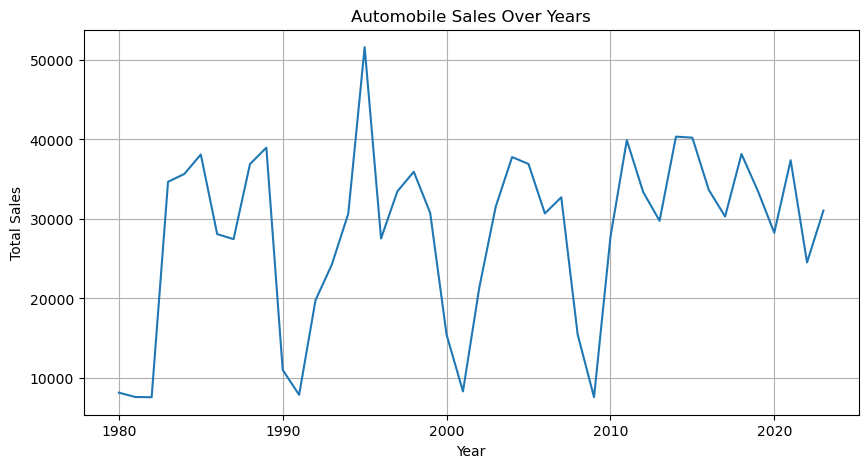

In [4]:
import matplotlib.pyplot as plt

sales_by_year = df.groupby("Year")["Automobile_Sales"].sum()

sales_by_year.plot(kind="line", figsize=(10, 5), title="Automobile Sales Over Years")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.grid(True)
plt.savefig("Line_plot_1.png")
plt.show()


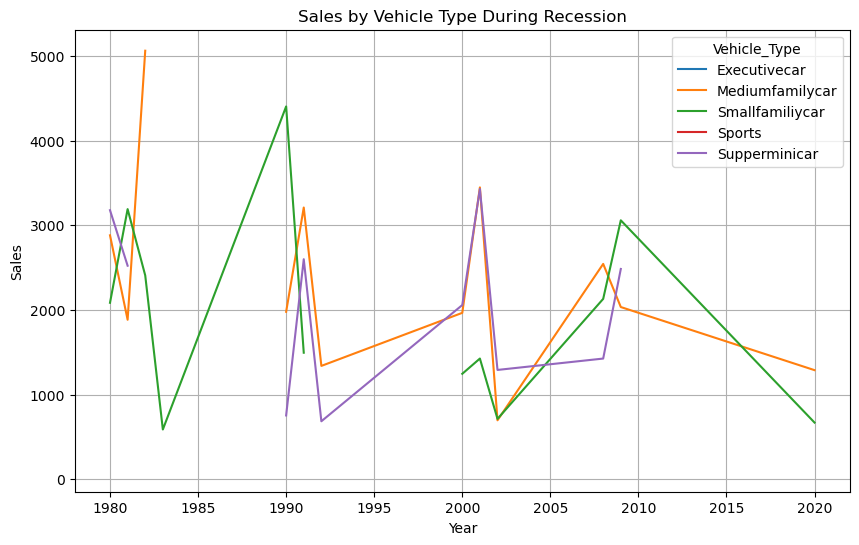

In [5]:
df_recession = df[df["Recession"] == True]

pivot = df_recession.pivot_table(values="Automobile_Sales", index="Year", columns="Vehicle_Type", aggfunc='sum')

pivot.plot(figsize=(10,6), title="Sales by Vehicle Type During Recession")
plt.ylabel("Sales")
plt.grid(True)
plt.savefig("Line_plot_2.png")
plt.show()


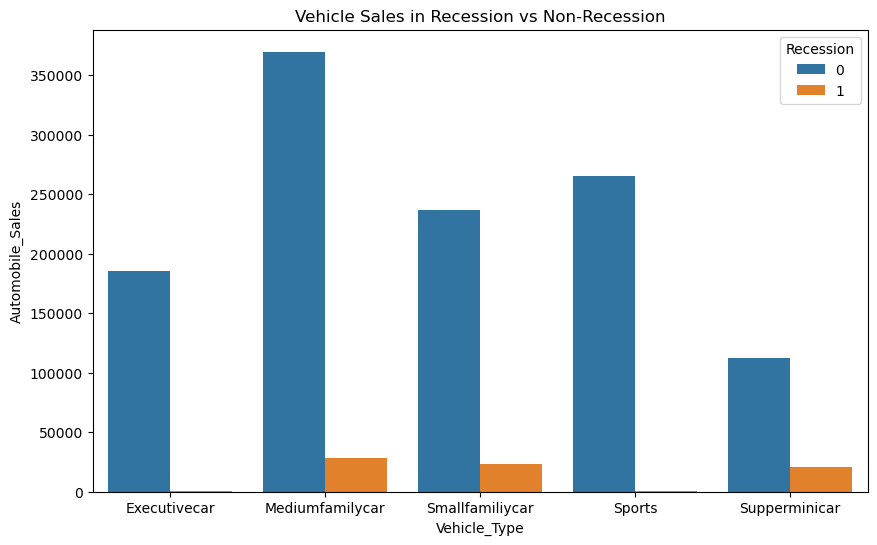

In [6]:
import seaborn as sns

bar_data = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=bar_data, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.title("Vehicle Sales in Recession vs Non-Recession")
plt.savefig("Bar_Chart.png")
plt.show()


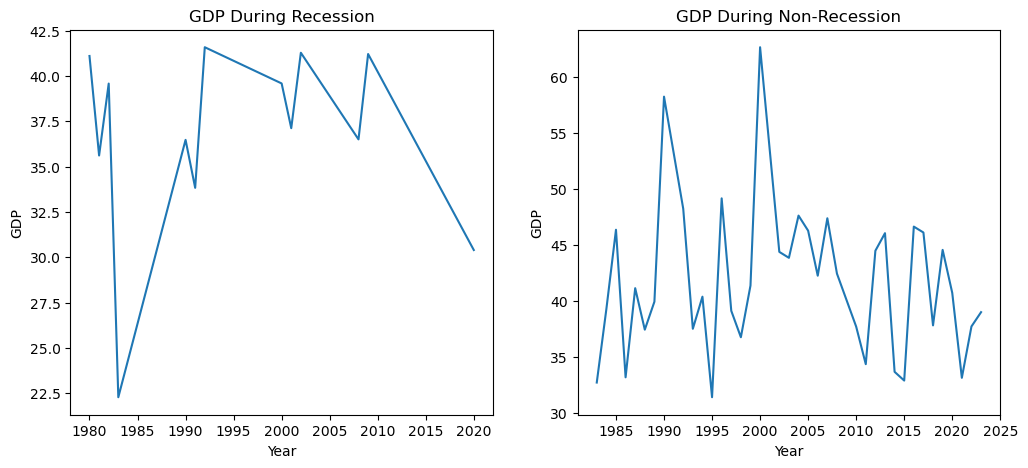

In [7]:
recession_gdp = df[df["Recession"] == True].groupby("Year")["GDP"].mean()
non_recession_gdp = df[df["Recession"] == False].groupby("Year")["GDP"].mean()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

recession_gdp.plot(ax=axs[0], title="GDP During Recession")
axs[0].set_ylabel("GDP")

non_recession_gdp.plot(ax=axs[1], title="GDP During Non-Recession")
axs[1].set_ylabel("GDP")

plt.savefig("Subplot.png")
plt.show()


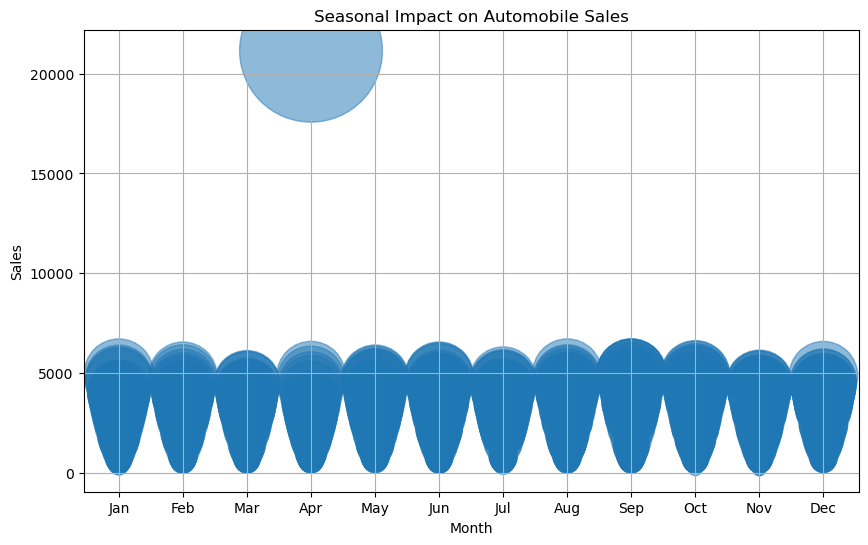

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df["Month"], df["Automobile_Sales"], s=df["Automobile_Sales"]*0.5, alpha=0.5)
plt.title("Seasonal Impact on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.savefig("Bubble.png")
plt.show()


In [18]:
import matplotlib.pyplot as plt

recession_df = df[df["Recession"] == True]
recession_df = recession_df[["Average_Vehicle_Price", "Automobile_Sales"]].dropna()

plt.figure(figsize=(8,6))
plt.scatter(recession_df["Average_Vehicle_Price"], recession_df["Automobile_Sales"], alpha=0.6, color="teal")
plt.title("Average Vehicle Price vs Sales During Recession")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.savefig("Scatter.png")
plt.show()


KeyError: "['Average_Vehicle_Price'] not in index"

<Figure size 800x600 with 0 Axes>

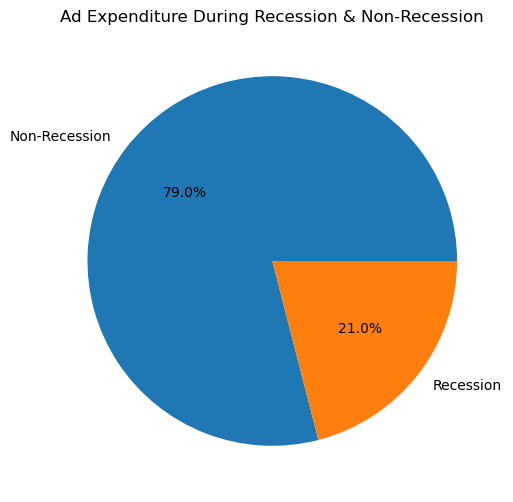

In [13]:
ad_expense = df.groupby("Recession")["Advertising_Expenditure"].sum()
ad_expense.index = ['Non-Recession', 'Recession']

plt.figure(figsize=(6,6))
plt.pie(ad_expense, labels=ad_expense.index, autopct='%1.1f%%')
plt.title("Ad Expenditure During Recession & Non-Recession")
plt.savefig("Pie_1.png")
plt.show()


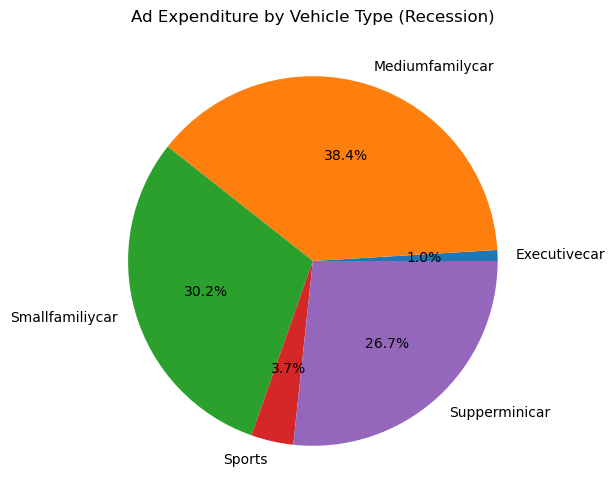

In [14]:
ad_type_recession = df[df["Recession"]==True].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

plt.figure(figsize=(8,6))
plt.pie(ad_type_recession, labels=ad_type_recession.index, autopct='%1.1f%%')
plt.title("Ad Expenditure by Vehicle Type (Recession)")
plt.savefig("Pie_2.png")
plt.show()


In [15]:
df_recession = df[df["Recession"] == True]

for v_type in df_recession["Vehicle_Type"].unique():
    subset = df_recession[df_recession["Vehicle_Type"] == v_type]
    plt.plot(subset["Unemployment_Rate"], subset["Automobile_Sales"], label=v_type)

plt.xlabel("Unemployment Rate")
plt.ylabel("Sales")
plt.title("Effect of Unemployment on Sales by Vehicle Type")
plt.legend()
plt.grid(True)
plt.savefig("Line_plot_3.png")
plt.show()


KeyError: 'Unemployment_Rate'

In [19]:

df_recession = df[df["Recession"] == True]

plt.figure(figsize=(10,6))
for v_type in df_recession["Vehicle_Type"].unique():
    subset = df_recession[df_recession["Vehicle_Type"] == v_type]
    subset = subset.dropna(subset=["Unemployment_Rate", "Automobile_Sales"])
    subset = subset.sort_values("Unemployment_Rate")
    plt.plot(subset["Unemployment_Rate"], subset["Automobile_Sales"], label=v_type)

plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.title("Unemployment Rate vs Vehicle Sales (Recession)")
plt.legend()
plt.grid(True)
plt.savefig("Line_plot_3.png")
plt.show()


KeyError: ['Unemployment_Rate']